# **💎Diamond Price Prediction💎**

## **Basic Knowledge**

#### **Context**
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.


#### **Content**
**Features Description:**
- **`price`** ➡ in US dollars (\$326 -- $18,823)
- **`carat`** ➡ weight of the diamond (0.2 -- 5.01)
- **`cut`** ➡ quality of the diamond's cut (Fair, Good, Very Good, Premium, and Ideal).
- **`color`** ➡ the color of diamond, from J (words) to D (best).
- **`clarity`** ➡ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **`x`** ➡ Length in mm (0 -- 10.74).
- **`y`** ➡ Width in mm (0 -- 58.9).
- **`z`** ➡ Depth in mm (0 -- 31.8).
- **`depth`** ➡ total depth percentage == `z/mean(x, y) = 2 * z/(x + y) (43-79)`.
- **`table`** ➡ width of top of diamond relative to widest point (43 -- 95).

#### **Resource**
- 🔗 [Kaggle - Diamond Price](https://www.kaggle.com/datasets/shivam2503/diamonds)
- 🔗 [tydiverse/ggplot2](https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv)

## **Import Libraries**

In [1]:
!pip install catboost

In [2]:
!python --version

Python 3.10.12


In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Modelling
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Metric and Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## **Loading Data**

In [4]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv'

diamonds = pd.read_csv(url)
diamonds

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [5]:
diamonds.shape

(53940, 10)

### **Quick Look the Data**

In [6]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Inline with the basic knowledge, this dataset contains **53940 rows** with **10 features or columns**.
- 3 features identified as categories (`cut`, `color`, `clarity`)
- 7 features identified as numerical (`carat`, `depth`, `table`, `price`, `x`, `y`, `z`)

And all of the features does not have any non-values, let's check.

In [8]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Check the **unique value for each categorical features**

In [9]:
categorical_features = ['cut', 'color', 'clarity']

for column in categorical_features:
    print(f"{column} : {diamonds[column].unique()}")
    print("=" * 30)

cut : ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color : ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity : ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


**Note:**

Again, inline with the Basic Knowledge.
- For `cut` there are 5 categories that caracterize the quality of diamonds.
- For `color` there are 7 categories that caracterize the color of diamonds.
- For `clarity` there are 9 categories that caracterize the clearness of diamonds.

Later, we will convert this into numerical variable (in data preprocessing)

Let's look the summary for our **Numerical Features**

In [10]:
diamonds.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

**Note:**

For numerical features we will look in a better way with visualization later (distribution, correlation, etc.).
- The `price` feature will be used as the target later.
- From the summary above for `x`, `y`, and `z` features having *`min=0`* which is not possible for a diamond to have that measure/size, so we will *drop that 0 value* later.

Check if there are any duplicated data

In [11]:
# drop duplicates
if diamonds.duplicated().any:
    print('Shape of Dataset before dropping duplicates: {}'.format(diamonds.shape))
    diamonds = diamonds.drop_duplicates()
    temp3 = diamonds.shape[0]
    print('Duplicates exist,and Shape of Dataset after dropping duplicates: {}'.format(diamonds.shape))

diamonds.reset_index(drop = True, inplace = True)

Shape of Dataset before dropping duplicates: (53940, 10)
Duplicates exist,and Shape of Dataset after dropping duplicates: (53794, 10)


## **Exploratory Data Analysis**
Let's explore the data deeper and try to gain some insights.

In [12]:
data = diamonds.copy()

In [13]:
data.shape

(53794, 10)

#### **Dimensionless Diamonds**
Filter out the zero value for "`x`", "`y`", "`z`". It indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds.


In [14]:
dimensionless_data = data.loc[(data[['x', 'y', 'z']] == 0).all(axis=1)]
dimensionless_data

carat        cut color clarity  depth  table  price    x    y    z
11935   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.0  0.0
15914   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.0  0.0
24464   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.0  0.0
26183   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0  0.0  0.0
27364   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.0  0.0
49413   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.0  0.0

In [15]:
# data[data["x"]==0].index

In [16]:
# Removing the dimensionless diamonds, that having min 0 value in either x, y or z features

# data = data.loc[(data[['x','y','z']] != 0).all(axis=1)]
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape


(53775, 10)

We loss around 19 data points by deleting the dimensionless diamonds.

In [17]:
data[['x', 'y', 'z']].describe()

x             y             z
count  53775.000000  53775.000000  53775.000000
mean       5.731579      5.734909      3.539964
std        1.118611      1.139451      0.702017
min        3.730000      3.680000      1.070000
25%        4.710000      4.720000      2.910000
50%        5.700000      5.710000      3.530000
75%        6.540000      6.540000      4.030000
max       10.740000     58.900000     31.800000

Done with cleaning the dimensionless (x, y, z equal to 0) of the diamonds.

### **Categorical Features**

In [18]:
categorical_features = ['cut', 'color', 'clarity']

In [19]:
data[categorical_features].head(5)

cut color clarity
0    Ideal     E     SI2
1  Premium     E     SI1
2     Good     E     VS1
3  Premium     I     VS2
4     Good     J     SI2

#### **Univariate Analysis**

📊 **Analysis `'cut'` feature**

In [20]:
## Desired order for Cut
desired_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

# Make sure the data is ordered according to the list
data[categorical_features[0]] = pd.Categorical(data[categorical_features[0]], categories=desired_order, ordered=True)

# Recalculate value counts, ensuring that it follows the desired order
cut_count = data[categorical_features[0]].value_counts().reindex(desired_order)

trace = go.Bar(
    x=cut_count.index,
    y=cut_count.values,
    text=cut_count.values,
    textposition='auto',
    textfont=dict(size=12)
)

# Create the layout
layout = go.Layout(
    title='The Quality of the Diamonds',
    xaxis=dict(showticklabels=True, title='Quality'),
    yaxis=dict(title='Total'),
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

There are 5 categories in the `Cut` feature in order from bad to best. From the percentage data we can conclude that **more than around 60% of the samples are high grade diamonds, namely `Ideal` and `Premium` grades.**

So it could be said that the **best quality (*Ideal, Premium*) diamonds are more widely available**, than the bad one.

In [21]:
# Desired order for 'Color' categories
desired_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
data[categorical_features[1]] = pd.Categorical(data[categorical_features[1]], categories=desired_order, ordered=True)
colors_count = data[categorical_features[1]].value_counts().reindex(desired_order)

trace = go.Bar(
    x=colors_count.index,
    y=colors_count.values,
    text=colors_count.values,
    textposition='auto',
    textfont=dict(size=12)
)

layout = go.Layout(
    title='The Colors of the Diamonds',
    xaxis=dict(showticklabels=True, title='Colors'),
    yaxis=dict(title='Total'),
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

Based on the information, the order of color categories from **worst to best is `J`, `I`, `H`, `G`, `F`, `E`, and `D`**. From the graph above, we can conclude that **most of the grades are in the middle grade, namely G, F, H**.

In [22]:
# Desired order for 'clarity' categories
desired_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
data[categorical_features[2]] = pd.Categorical(data[categorical_features[2]], categories=desired_order, ordered=True)
clarity_counts = data[categorical_features[2]].value_counts().reindex(desired_order)

trace = go.Bar(
    x=clarity_counts.index,
    y=clarity_counts.values,
    text=clarity_counts.values,
    textposition='auto',
    textfont=dict(size=12)
)

layout = go.Layout(
    title='The Clearness of the Diamonds',
    xaxis=dict(showticklabels=True, title='Clearness'),
    yaxis=dict(title='Total'),
)


fig = go.Figure(data=[trace], layout=layout)
fig.show()

Based on information from the basic knowledge, the `Clarity` feature consists of 8 categories from **worst to best, namely: `I1`, `SI2`, `SI1`, `VS2`, `VS1`, `VVS2`, `VVS1`, and `IF`.**

**Detailed Information:**
1. `'IF'` - Internally Flawless
2. `'VVS2'` - Very Very Slight Inclusions
3. `'VVS1'` - Very Very Slight Inclusions
4. `'VS1'` - Very Slight Inclusions
5. `'VS2'` - Very Slight Inclusions
6. `'SI2'` - Slight Inclusions
7. `'SI1'` - Slight Inclusions
8. `'I1'` - Imperfect

From the graph we can conclude that, it is right skewed with **most of the clearness of the diamonds are lower middle grade, namely `SI2`, `SI1`, and `VS2`.**

#### **Multivariate Analysis**

In [23]:
# Calculate mean price for each category
mean_cut = data.groupby(categorical_features[0])['price'].mean().reset_index()
mean_color = data.groupby(categorical_features[1])['price'].mean().reset_index()
mean_clarity = data.groupby(categorical_features[2])['price'].mean().reset_index()

# Create the bar charts
trace1 = go.Bar(
    x=mean_cut[categorical_features[0]],
    y=round(mean_cut['price'], 2),
    name="Cut",
    marker=dict(color='skyblue')
)
trace2 = go.Bar(
    x=mean_color[categorical_features[1]],
    y=round(mean_color['price'], 2),
    name="Color",
    marker=dict(color='lightgreen')
)
trace3 = go.Bar(
    x=mean_clarity[categorical_features[2]],
    y=round(mean_clarity['price'], 2),
    name="Clarity",
    marker=dict(color='salmon')
)

# Layout with vertical alignment (1 column, 3 rows)
layout = go.Layout(
    title='Average Price by Cut, Color, and Clarity',
    xaxis=dict(title=categorical_features[0]),  # For Cut
    yaxis=dict(title='Average Price', domain=[0, 1]),
    xaxis2=dict(title=categorical_features[1]),  # For Color
    yaxis2=dict(title='Average Price', anchor='x2'),
    xaxis3=dict(title=categorical_features[2]),  # For Clarity
    yaxis3=dict(title='Average Price', anchor='x3'),

    grid=dict(rows=3, columns=1, pattern='independent'),  # 3 rows, 1 column
)

# Combine traces and create the figure
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

**Insights from the analysis above:**
- In the `'cut'` feature, the average prices tend to be similar. The range is between 3400 to 4500. The highest grade, namely the Ideal grade, has the lowest average price among the other grades.
- In the `'color'` feature, *the lower the color grade, the higher the price of diamonds*.
- In the `'clarity'` feature, in general, diamonds with a lower grade have a higher average price.

📓 **Category features have a low influence on price**, because of it distribution (**higher grade doesn't mean to have a higher average price also, and vice versa**.).

### **Numerical Features**

In [24]:
data.describe()

carat         depth         table         price             x  \
count  53775.000000  53775.000000  53775.000000  53775.000000  53775.000000   
mean       0.797536     61.748232     57.457806   3931.220288      5.731579   
std        0.473169      1.429639      2.233257   3985.918716      1.118611   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53775.000000  53775.000000  
mean       5.734909      3.539964  
std        1.139451      0.702017  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max       58.900000     31.800000

Let's see the distribution of `'Price'`

In [25]:
trace1 = go.Histogram(
    x=data['price'],
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))

layout = go.Layout(barmode='overlay',
                   title='Diamond Price Distribution',
                   xaxis=dict(title='Diamond Price'),
                   yaxis=dict(title='Count'),
)

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

It shows that our `price` distribution have skewed to the right, which is most of the distribution is around the left (low price). The average of the price around `$4000`, the **price range for diamonds is quite high, namely from `$200` to `$18,800`**, and **most of the price are mostly in the range  to x range `$400` to `$4600`**.

📓 **The higher the price of diamonds, the fewer there are available, and vice versa. Also, people tend to buy at the average price.**

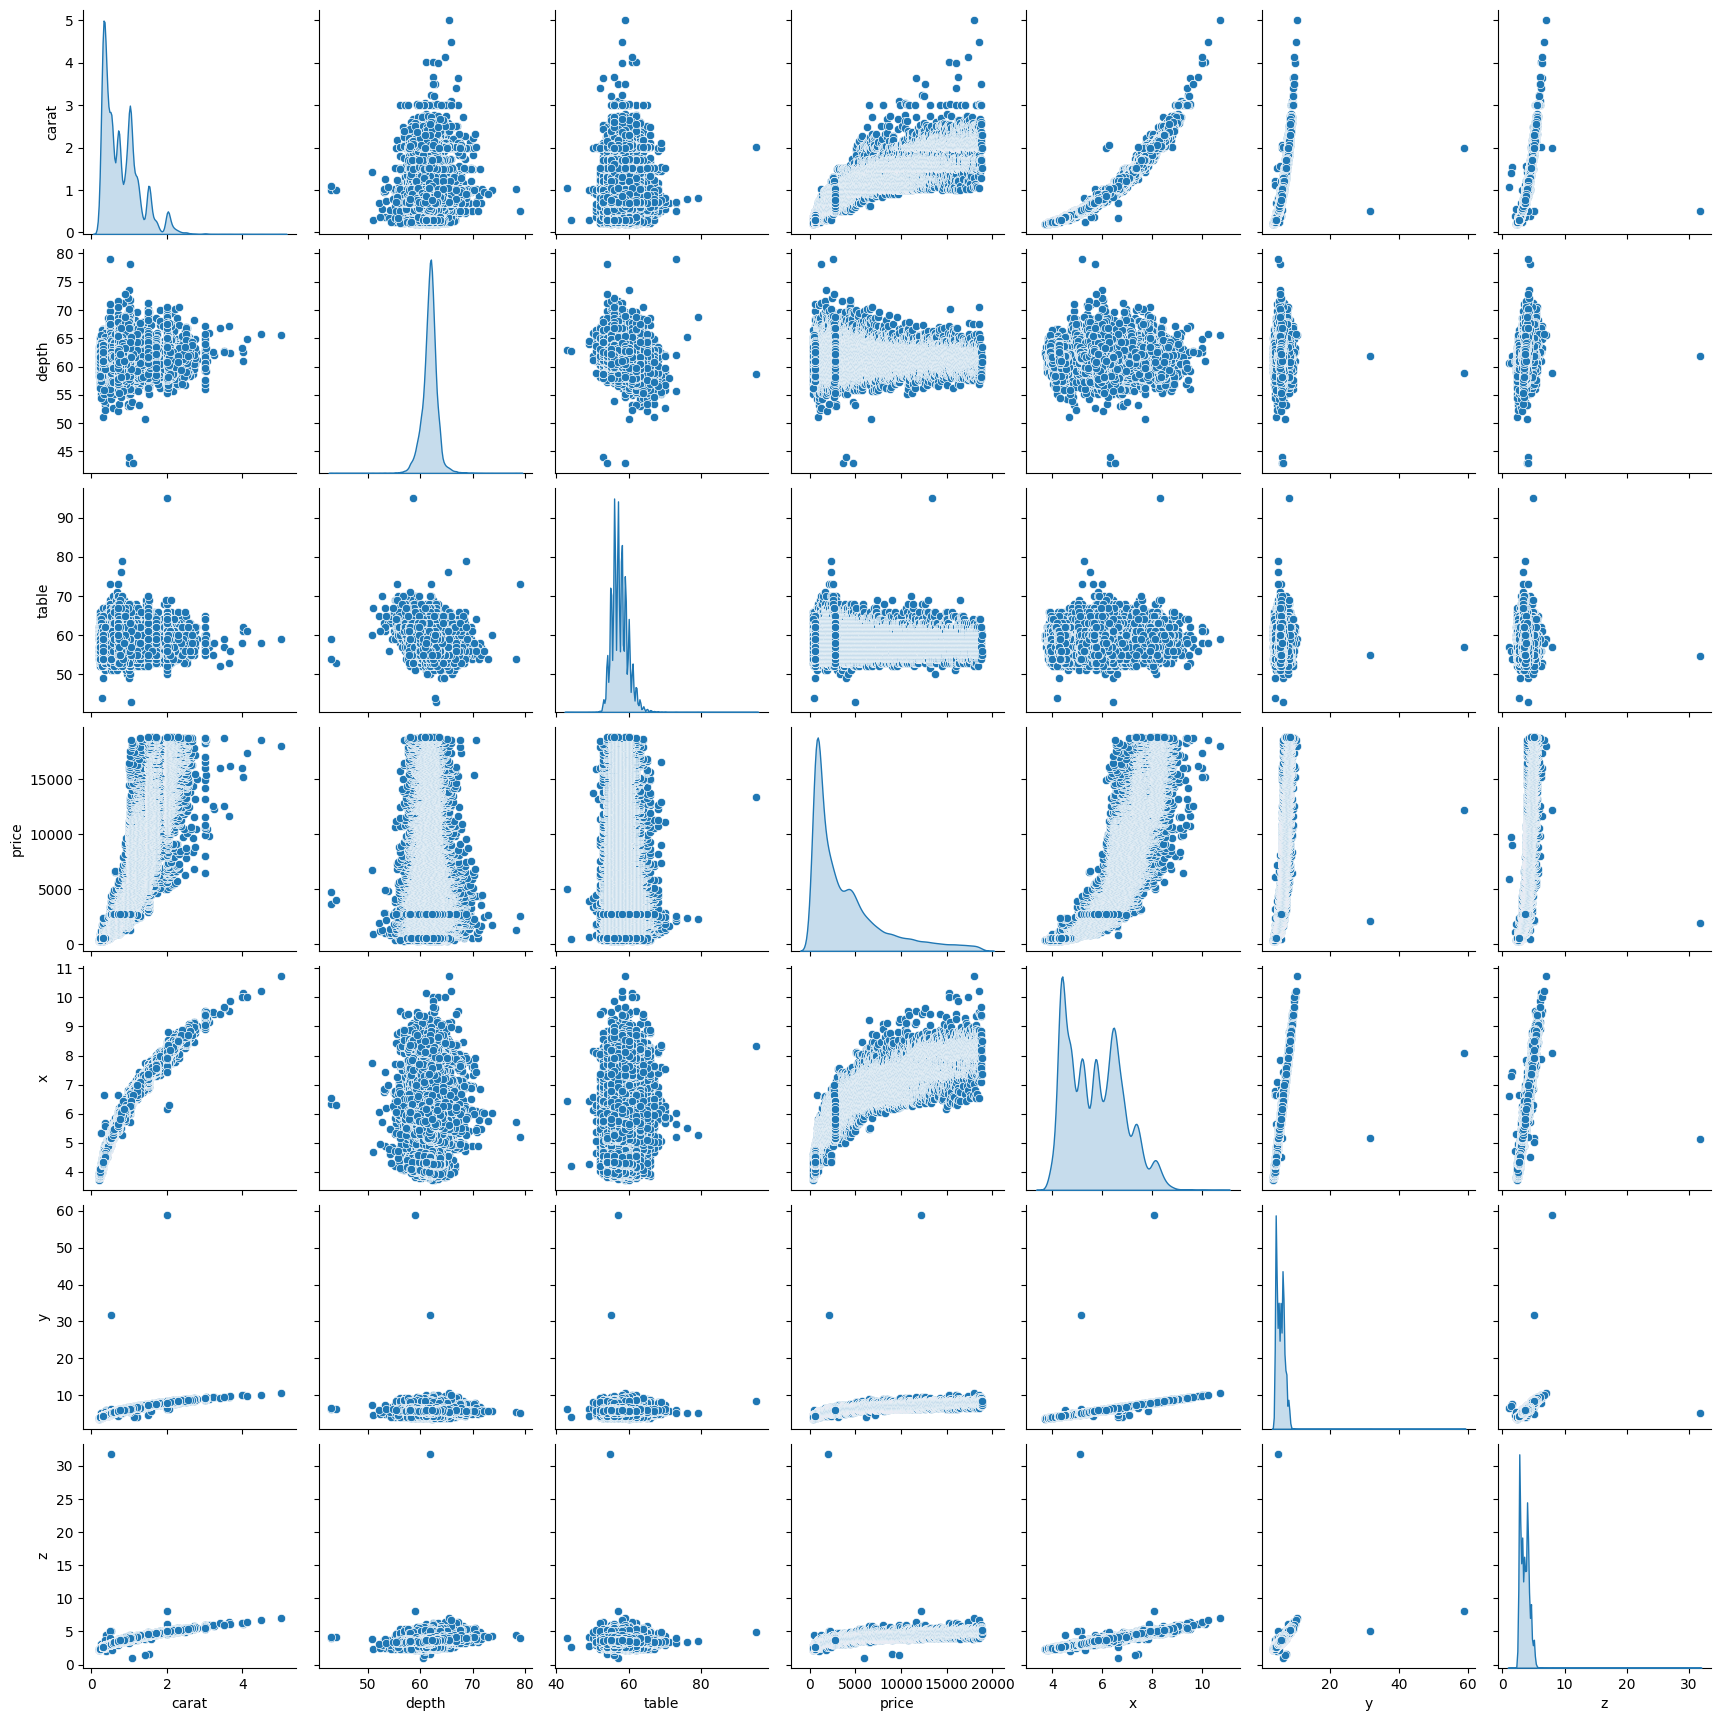

In [26]:
# Relation for each numerical features using pairplot()
sns.pairplot(data, diag_kind='kde')

Let's observe the figure above, especially focusing on the **`"price"`** feature which is the target feature. From the "price" we can obtain several information:
- The higher the price, the fewer the availability
- Based on `price`, for feature like `carat`, `depth`, `table`, like `x`, `y`, and `z` there are tend to have an *outliers* (*will drop it later*).
- The feature `depth` and `table` have a slight low correlation with `price`, but a for feature `carat`, `x`, `y`, and `z` it show a positive correlation

Now let's check the correlation for each numerical features more deep

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

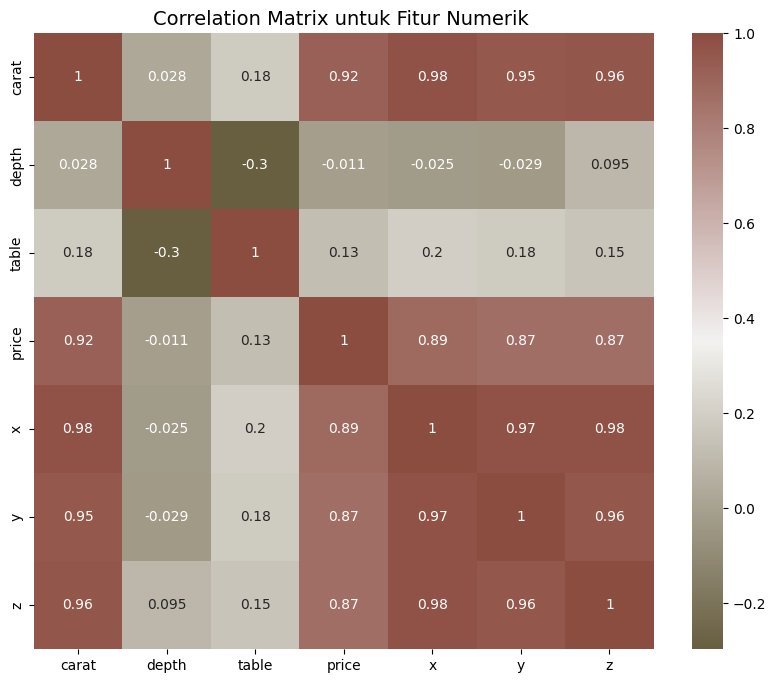

In [27]:
#correlation matrix
numerical_features = data.select_dtypes(exclude='category')

cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat,cmap=cmap,annot=True, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=14)

**Note to focus on `Price`**:

- `"carat"`, `"x"`, `"y"` and `"z"` show a high correlation to the target (*price*) column.
- `"depth"` and `"table"` show low correlation. It could consider dropping but let's keep it for notw

## Data Preprocessing
**Steps involved in Data Preprocessing**:
- Identifying and removing outliers
- Encoding categorical variables
- Standardize

### Handling Outliers

In [28]:
data.describe()

carat         depth         table         price             x  \
count  53775.000000  53775.000000  53775.000000  53775.000000  53775.000000   
mean       0.797536     61.748232     57.457806   3931.220288      5.731579   
std        0.473169      1.429639      2.233257   3985.918716      1.118611   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53775.000000  53775.000000  
mean       5.734909      3.539964  
std        1.139451      0.702017  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max       58.900000     31.800000

Like our analysis before, there are tends to have an outlier for each features. Let's check how bad our distribution is with.

In [29]:
numerical_features = data.select_dtypes(include='float64').columns

def outliers_boxplots(data, columns=numerical_features, title="outlier Numeric Columns", color="crimson"):
    fig = make_subplots(rows=1, cols=len(columns), subplot_titles=columns)
    for i, column in enumerate(columns):
        trace = go.Box(y=data[column],name=f'{column}',marker=dict(color=color))
        fig.add_trace(trace, row=1, col=i+1)
    fig.update_layout(title_text=title, title_x=0.5)
    fig.show()

outliers_boxplots(data, numerical_features)

It shows a lot of outliers for each feature. We will handle this outlier by using the IQR method.

In [30]:
# Remove Outliers
def remove_outliers_iqr(data):
    # Selecting only float features
    float_columns = data.select_dtypes(include=['float64']).columns

    q1 = data[float_columns].quantile(0.20)
    q3 = data[float_columns].quantile(0.80)
    iqr = q3 - q1

    # Identify outliers
    outlier_mask = ((data[float_columns] < (q1 - 1.5 * iqr)) | (data[float_columns] > (q3 + 1.5 * iqr)))

    # Remove outliers
    data_cleaned = data[~outlier_mask.any(axis=1)]

    return data_cleaned

# Exceuting Function
data_after_outliers = remove_outliers_iqr(data)

In [32]:
data_after_outliers.head()

carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48

Let's check again what the boxplot look life after our remove the outliers

In [33]:
outliers_boxplots(data_after_outliers, numerical_features)

Looks more clean, then before.

In [34]:
# Check the final shape of the dataset
print(f"Shape of Data before remove the outliers: {data.shape}")
print(f"Shape of Data after remove the outliers: {data_after_outliers.shape}")

Shape of Data before remove the outliers: (53775, 10)
Shape of Data after remove the outliers: (51938, 10)


In [35]:
# Checkpoint ---
data_after_outliers.to_csv('diamonds-clean.csv')